# ***Visualizing Operational Efficiency in Animal Shelters***

### **Milestone - 2 Clean, Manipulate, and Structure the data to build clear and informative visuals.**

In [3]:
#Importing all the required libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
import squarify

##  **Animal Intakes Data**

In [5]:
#Loading the Animal Intakes Data
intakes_data = pd.read_csv("Austin_Animal_Center_Intakes_20241105.CSV")

In [6]:
#Looking as to how the data looks like
intakes_data.head()

,Animal ID,Name,DateTime,MonthYear,Found Location,Intake Type,Intake Condition,Animal Type,Sex upon Intake,Age upon Intake,Breed,Color
0,A786884,*Brock,01/03/2019 04:19:00 PM,January 2019,2501 Magin Meadow Dr in Austin (TX),Stray,Normal,Dog,Neutered Male,2 years,Beagle Mix,Tricolor
1,A706918,Belle,07/05/2015 12:59:00 PM,July 2015,9409 Bluegrass Dr in Austin (TX),Stray,Normal,Dog,Spayed Female,8 years,English Springer Spaniel,White/Liver
2,A724273,Runster,04/14/2016 06:43:00 PM,April 2016,2818 Palomino Trail in Austin (TX),Stray,Normal,Dog,Intact Male,11 months,Basenji Mix,Sable/White
3,A665644,NaN,10/21/2013 07:59:00 AM,October 2013,Austin (TX),Stray,Sick,Cat,Intact Female,4 weeks,Domestic Shorthair Mix,Calico
4,A857105,Johnny Ringo,05/12/2022 12:23:00 AM,May 2022,4404 Sarasota Drive in Austin (TX),Public Assist,Normal,Cat,Neutered Male,2 years,Domestic Shorthair,Orange Tabby


In [7]:
#Breaking Month Year into Month and Year as two separate columns
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    intakes_data[['Month','Year']] = intakes_data['MonthYear'].str.split(' ',expand=True)

In [8]:
#Breaking Found Location into City and State as two separate columns
with warnings.catch_warnings():
    warnings.simplefilter("ignore")

    # Defining a function
    def split_location(location):
        parts = location.rsplit(' ', 2)
        
        # If there's only one space, we treat the first part as City and the second as State
        if len(parts) == 2:
            city, state = parts
        elif len(parts) > 2:
            # if location has more than one space then split at the second last space
            city, state = parts[-2:]
        else:
            # If the format is unexpected, we are returning NaN
            city, state = np.nan, np.nan
            
        return pd.Series([city, state])

# Apply the function to the 'Found Location' column
intakes_data[['City', 'State']] = intakes_data['Found Location'].apply(split_location)

In [9]:
#Viewing the descriptive stats for the Animal Intakes data
intakes_data.describe()

,Animal ID,Name,DateTime,MonthYear,Found Location,Intake Type,Intake Condition,Animal Type,Sex upon Intake,Age upon Intake,Breed,Color,Month,Year,City,State
count,168620,120090,168620,168620,168620,168620,168620,168620,168618,168619,168620,168620,168620,168620,168620,168620
unique,151546,29161,116247,134,68388,6,20,5,5,55,2972,651,12,12,28,2
top,A721033,Luna,09/23/2016 12:00:00 PM,June 2015,Austin (TX),Stray,Normal,Dog,Intact Male,1 year,Domestic Shorthair Mix,Black/White,May,2019,Austin,(TX)
freq,33,727,64,2189,30660,115707,143111,92056,57128,27502,33629,17477,17609,19727,138226,166584


**For the objectives of this project, the Name, DateTime, MonthYear, Found Location, Breed, Color and State columns can be dropped.**

**Why?**

1. Name, DateTime, Breed and Color columns will not be necessary, as our analysis does not require data at such a granular level.

2. Found Location and MonthYear are being dropped as we have transformed and created new columns using the existing ones.

3. State is also being dropped because the dataset is from the State of Texas and all the data points will have state as Texas (TX).

In [11]:
intakes_data.drop(['Name','DateTime','MonthYear','Found Location','Breed','Color','State'], axis=1, inplace=True)

In [12]:
intakes_data.columns.to_list()

['Animal ID',
 'Intake Type',
 'Intake Condition',
 'Animal Type',
 'Sex upon Intake',
 'Age upon Intake',
 'Month',
 'Year',
 'City']

**Here we can see that the selected columns have been dropped from the data frame.**

In [14]:
intakes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168620 entries, 0 to 168619
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Animal ID         168620 non-null  object
 1   Intake Type       168620 non-null  object
 2   Intake Condition  168620 non-null  object
 3   Animal Type       168620 non-null  object
 4   Sex upon Intake   168618 non-null  object
 5   Age upon Intake   168619 non-null  object
 6   Month             168620 non-null  object
 7   Year              168620 non-null  object
 8   City              168620 non-null  object
dtypes: object(9)
memory usage: 11.6+ MB


**Without even having to use the isna() function we can clearly see that out of 168,620 rows and 8 columns only two of them have missing values and that too the count is not very significant, only a couple of rows are missing and imputting them will not benefit the analysis significantly. So we are going to drop those two rows of data from intakes_data.**

In [16]:
intakes_data_cleaned = intakes_data.dropna(axis=0,how='any')

In [17]:
intakes_data_cleaned.isnull().any()

Animal ID           False
Intake Type         False
Intake Condition    False
Animal Type         False
Sex upon Intake     False
Age upon Intake     False
Month               False
Year                False
City                False
dtype: bool

***We can clearly see that none of the columns have missing values as we have dropped them.***

In [19]:
intakes_data_cleaned.tail(n=10)

,Animal ID,Intake Type,Intake Condition,Animal Type,Sex upon Intake,Age upon Intake,Month,Year,City
168610,A902459,Owner Surrender,Normal,Cat,Intact Female,1 year,April,2024,Austin
168611,A915712,Stray,Normal,Dog,Intact Male,1 year,November,2024,Austin
168612,A917339,Stray,Normal,Cat,Intact Male,1 year,November,2024,Travis
168613,A917373,Stray,Neonatal,Cat,Unknown,4 weeks,November,2024,Austin
168614,A917347,Stray,Normal,Cat,Intact Male,4 months,November,2024,Austin
168615,A917365,Stray,Normal,Dog,Intact Female,1 year,November,2024,Austin
168616,A917357,Stray,Normal,Dog,Intact Female,1 year,November,2024,Austin
168617,A902460,Owner Surrender,Normal,Cat,Intact Female,1 year,April,2024,Austin
168618,A916886,Stray,Normal,Cat,Intact Male,2 years,October,2024,Travis
168619,A914535,Owner Surrender,Normal,Cat,Intact Female,1 month,October,2024,Austin


**The final cleaned data for the animal intakes is "intakes_data_cleaned".**

Note: Animal ID is a key assigned to each intake or when there has been any update to that record, at present the exploration to join this field to the Animal ID of outcomes data is yet to be done. As this falls outide the scope of the project at present.

##  **Animal Outcomes Data**

In [22]:
outcomes_data = pd.read_csv("Austin_Animal_Center_Outcomes_20241105.CSV")

In [23]:
outcomes_data.head()

,Animal ID,Name,DateTime,MonthYear,Date of Birth,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color
0,A882831,*Hamilton,07/01/2023 06:12:00 PM,Jul 2023,03/25/2023,Adoption,NaN,Cat,Neutered Male,3 months,Domestic Shorthair Mix,Black/White
1,A794011,Chunk,05/08/2019 06:20:00 PM,May 2019,05/02/2017,Rto-Adopt,NaN,Cat,Neutered Male,2 years,Domestic Shorthair Mix,Brown Tabby/White
2,A776359,Gizmo,07/18/2018 04:02:00 PM,Jul 2018,07/12/2017,Adoption,NaN,Dog,Neutered Male,1 year,Chihuahua Shorthair Mix,White/Brown
3,A821648,NaN,08/16/2020 11:38:00 AM,Aug 2020,08/16/2019,Euthanasia,NaN,Other,Unknown,1 year,Raccoon,Gray
4,A720371,Moose,02/13/2016 05:59:00 PM,Feb 2016,10/08/2015,Adoption,NaN,Dog,Neutered Male,4 months,Anatol Shepherd/Labrador Retriever,Buff


In [24]:
#Breaking Month Year into Month and Year as two separate columns
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    outcomes_data[['Month','Year']] = outcomes_data['MonthYear'].str.split(' ',expand=True)

In [25]:
#Viewing the descriptive stats for the Animal Outcomes data
outcomes_data.describe()

,Animal ID,Name,DateTime,MonthYear,Date of Birth,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color,Month,Year
count,168536,120154,168536,168536,168536,168492,77383,168536,168534,168525,168536,168536,168536,168536
unique,151457,29100,140645,134,8518,11,26,5,5,55,2974,654,12,12
top,A721033,Luna,04/18/2016 12:00:00 AM,Jun 2019,05/01/2016,Adoption,Partner,Dog,Neutered Male,1 year,Domestic Shorthair Mix,Black/White,Jul,2019
freq,33,729,39,2244,121,81294,39523,91985,59042,27962,33995,17484,16506,19775


**For the objectives of this project, the Name, DateTime, Date of Birth, Breed and Color columns can be dropped.**

**Why?**

1. Name, DateTime, Date of Birth, Breed and Color columns will not be necessary, as our analysis does not require data at such a granular level.

2. MonthYear is being dropped as we have transformed and created new columns using the existing ones.

In [27]:
outcomes_data.drop(['Name','DateTime','MonthYear','Date of Birth','Breed','Color'],axis=1, inplace=True)

In [28]:
outcomes_data.columns.to_list()

['Animal ID',
 'Outcome Type',
 'Outcome Subtype',
 'Animal Type',
 'Sex upon Outcome',
 'Age upon Outcome',
 'Month',
 'Year']

**Here we can see that the five selected columns have been dropped from the data frame.**

In [30]:
outcomes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168536 entries, 0 to 168535
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Animal ID         168536 non-null  object
 1   Outcome Type      168492 non-null  object
 2   Outcome Subtype   77383 non-null   object
 3   Animal Type       168536 non-null  object
 4   Sex upon Outcome  168534 non-null  object
 5   Age upon Outcome  168525 non-null  object
 6   Month             168536 non-null  object
 7   Year              168536 non-null  object
dtypes: object(8)
memory usage: 10.3+ MB


**We can clearly see that Outcome Subtype column is having a lot of missing values nearly more than 50% of the data is missing values, let's take a look at what unique values does this field store.**

In [32]:
print(outcomes_data['Outcome Subtype'].unique())

[nan 'Partner' 'Foster' 'Snr' 'SCRP' 'Out State' 'Suffering' 'At Vet'
 'Underage' 'Rabies Risk' 'In Kennel' 'Offsite' 'Aggressive' 'Field'
 'Emergency' 'Enroute' 'In Foster' 'Behavior' 'Medical'
 'Court/Investigation' 'Possible Theft' 'Barn' 'Customer S' 'In State'
 'Emer' 'In Surgery' 'Prc']


**We can eliminate this column as well alongside other columns as it isn't needed for our project.**

**Note: The columns are being dropped only after careful consideration of their relevance to the analysis. Fields such as Name, DateTime, Date of Birth, Breed, Outcome Subtype, and Color provide detailed, case-specific information. However, the focus of this analysis is on higher-level trends, such as Yearly Adoption Trends and Outcome Distribution, where individual-level details are not necessary.**

**Therefore, these columns are dropped to streamline the analysis and ensure we are addressing the key questions without unnecessary complexity.**

In [35]:
outcomes_data.drop("Outcome Subtype",axis=1,inplace=True)

In [36]:
#Checking for null values
outcomes_data.isnull().sum()

Animal ID            0
Outcome Type        44
Animal Type          0
Sex upon Outcome     2
Age upon Outcome    11
Month                0
Year                 0
dtype: int64

**Although, we have dropped the Outcome Subtype column we can still see that there are a couple of columns which have missing values in them. Rather than trying to imputing them, it would be more efficient to carry forward the analysis if we drop them as the count is not very high and not alarming.**

In [38]:
outcomes_data_cleaned = outcomes_data.dropna(axis=0,how='any')

In [39]:
#Checking for null values after dropping the null records
outcomes_data_cleaned.isnull().any()

Animal ID           False
Outcome Type        False
Animal Type         False
Sex upon Outcome    False
Age upon Outcome    False
Month               False
Year                False
dtype: bool

In [40]:
outcomes_data_cleaned.tail(n=10)

,Animal ID,Outcome Type,Animal Type,Sex upon Outcome,Age upon Outcome,Month,Year
168525,A917368,Transfer,Cat,Unknown,4 days,Nov,2024
168526,A916090,Adoption,Cat,Spayed Female,2 months,Nov,2024
168527,A916986,Adoption,Dog,Spayed Female,2 months,Nov,2024
168528,A917267,Return to Owner,Dog,Spayed Female,2 years,Nov,2024
168529,A916886,Adoption,Cat,Neutered Male,2 years,Nov,2024
168530,A915686,Adoption,Dog,Neutered Male,1 year,Nov,2024
168531,A902459,Adoption,Cat,Spayed Female,1 year,Apr,2024
168532,A902460,Adoption,Cat,Spayed Female,1 year,Apr,2024
168533,A914535,Adoption,Cat,Spayed Female,2 months,Nov,2024
168535,A916088,Adoption,Dog,Intact Male,2 years,Nov,2024


**The final cleaned data for the animal outcomes is "outcomes_data_cleaned".**

Note: As stated in the Animal Intakes section, Animal ID can be joined with Intakes data to track the animal's status over time, but this falls out of the scope of the project. Once all the questions are answered this part of the equation is worth exploring.

**Note:**
Due to changes in the scope of the project, the primary questions we are aiming to analyze have been updated when compared to Milestone 1. The focus is now on the following key questions:

1. How many animals are brought into the shelter on average yearly?
2. Which intake type is contributing to the influx of animals into the shelter?
3. What are the possible outcomes for the animals taken into the shelter?
4. Over time, has the adoption rate of animals from the shelter increased or decreased?

## **Visual Analysis**

**1. How many animals are brought into the shelter on average yearly?**

In [45]:
yearly_intakes = intakes_data_cleaned.groupby('Year')

total_yearly_intakes = yearly_intakes['Animal ID'].nunique()

total_yearly_intakes = total_yearly_intakes.reset_index(name = 'Count of Intakes')

print(total_yearly_intakes)

    Year  Count of Intakes
0   2013              4075
1   2014             17691
2   2015             17606
3   2016             16497
4   2017             16356
5   2018             15726
6   2019             18398
7   2020              9133
8   2021             11295
9   2022             11329
10  2023             10787
11  2024              9931


We are using the Year column to group the records alongside getting the number of unique - Animal ID's count using the nunique() function. By, this we get a grouped values of yearly animal intakes at the shelter.

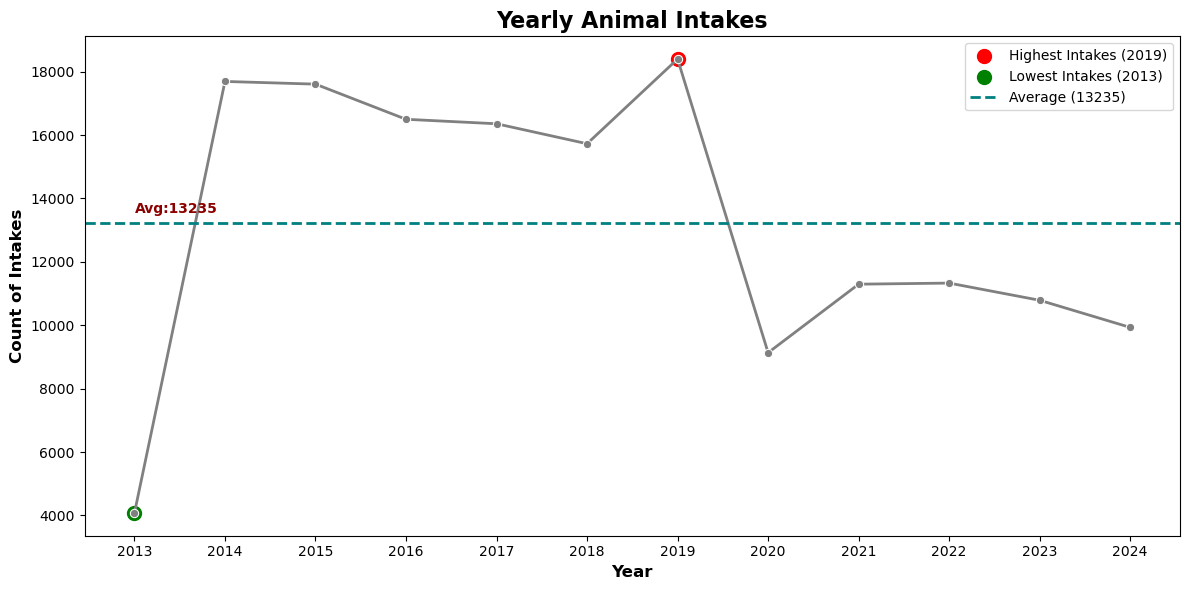

In [47]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=total_yearly_intakes, x='Year', y='Count of Intakes', marker='o', linewidth=2, color='grey')

# Get the highest and lowest values along with their Years
max_value = total_yearly_intakes['Count of Intakes'].max()
min_value = total_yearly_intakes['Count of Intakes'].min()

max_year = total_yearly_intakes[total_yearly_intakes['Count of Intakes'] == max_value]['Year'].values[0]
min_year = total_yearly_intakes[total_yearly_intakes['Count of Intakes'] == min_value]['Year'].values[0]

# Adding Markers
plt.scatter(max_year, max_value, color='red', s=100, label=f'Highest Intakes ({max_year})')
plt.scatter(min_year, min_value, color='green', s=100, label=f'Lowest Intakes ({min_year})')

# Calculating the average intakes
average_value = total_yearly_intakes['Count of Intakes'].mean()
plt.axhline(average_value, color='teal', linestyle='--', linewidth=2, label=f'Average ({average_value:.0f})')

plt.text(
    total_yearly_intakes['Year'].min(), 
    average_value + 300, 
    f'Avg:{average_value:.0f}', 
    color='darkred', 
    fontsize=10, 
    fontweight='bold'
)

# Adding titles and labels
plt.title('Yearly Animal Intakes', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=12, fontweight='bold')
plt.ylabel('Count of Intakes', fontsize=12, fontweight='bold')
plt.legend()

plt.tight_layout()
plt.show()

**Based on the visual and the accompanying tabular data, it is evident that 2019 had the highest intakes, while 2013 recorded the lowest intakes and on average the shelter is getting 13235 intakes per year.**

**Some key observations and assumptions derived from the visual are as follows:**

1. 2013 appears to have the lowest intakes, which could be attributed to it being the year when data collection began.
2. A noticeable spike in intakes can be seen in 2014, possibly due to it being the second year of data collection. However, there are no significant changes in the following years, suggesting stabilization after the initial increase.
3. 2019 stands out as the year with the highest number of intakes between 2013 and 2024.
4. The significant drop in intakes observed in 2020 can likely be attributed to the global lockdowns and disruptions caused by the COVID-19 pandemic.

**2. Which intake type is contributing to the influx of animals into the shelter?**

In [50]:
intakes_type = intakes_data_cleaned.groupby('Intake Type')

total_intakes_type = intakes_type['Animal ID'].nunique()

total_intakes_type = total_intakes_type.reset_index(name='Count of Intakes')

print(total_intakes_type)

          Intake Type  Count of Intakes
0           Abandoned              1755
1  Euthanasia Request               261
2     Owner Surrender             31402
3       Public Assist              9328
4               Stray            110243
5            Wildlife              6318


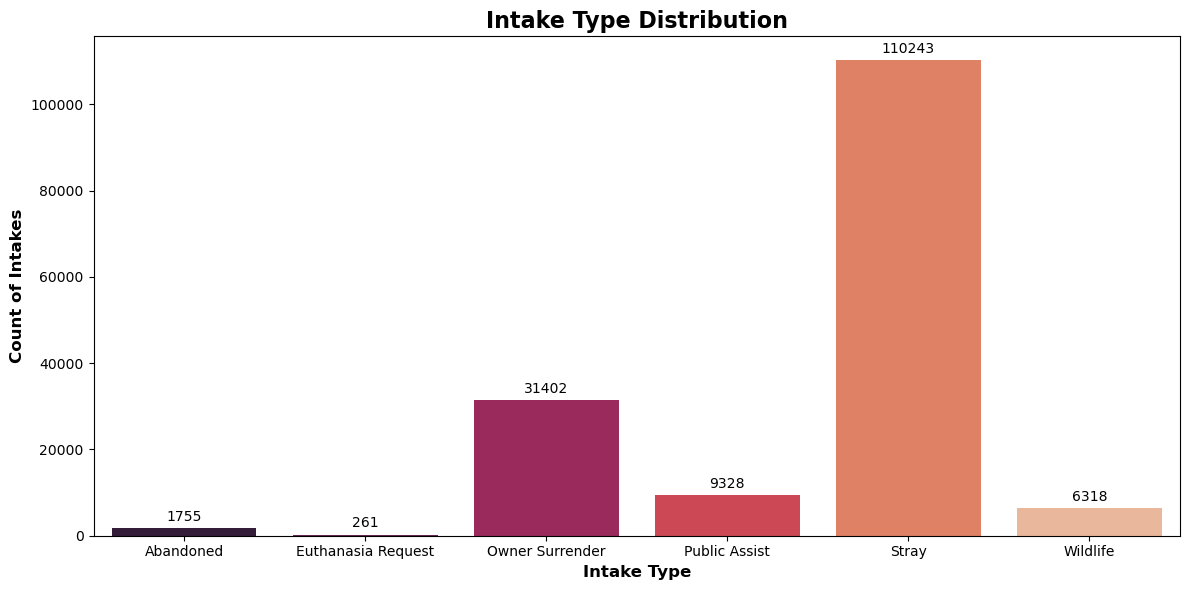

In [51]:
plt.figure(figsize=(12, 6))
ax = sns.barplot(data= total_intakes_type, x='Intake Type', y='Count of Intakes', hue='Intake Type', legend=False, palette='rocket')

plt.title("Intake Type Distribution", fontsize=16, fontweight='bold')
plt.xlabel("Intake Type", fontsize=12, fontweight='bold')
plt.ylabel("Count of Intakes", fontsize=12, fontweight='bold')

# Adding data labels
for p in ax.patches:
    ax.annotate(
        format(p.get_height(), '.0f'),
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='center', 
        xytext=(0, 8), 
        textcoords='offset points', 
        fontsize=10
    )

plt.tight_layout()
plt.show()

**Stray rescues were the most prominent intake type at the shelter, followed by Owner Surrender and Public Assist.**

> *It is a common trend across animal shelters worldwide that the majority of intakes come from strays, making this result unsurprising. However, what is notable in the shelter being analyzed is the relatively low number of intakes resulting from requests for euthanasia.*

This insight can help shelter management better understand the primary intake types and guide resource allocation and operational strategies accordingly.

**3. What can be the possible outcomes for the animals that are taken into the shelter?**

In [54]:
outcomes_type = outcomes_data_cleaned.groupby('Outcome Type')

total_outcomes_type = outcomes_type['Animal ID'].nunique()

total_outcomes_type = total_outcomes_type.reset_index(name = 'Count')

print(total_outcomes_type)

       Outcome Type  Count
0          Adoption  73830
1              Died   1606
2          Disposal    839
3        Euthanasia  10508
4              Lost      3
5           Missing     88
6          Relocate     27
7   Return to Owner  21930
8         Rto-Adopt   1164
9            Stolen      5
10         Transfer  47319


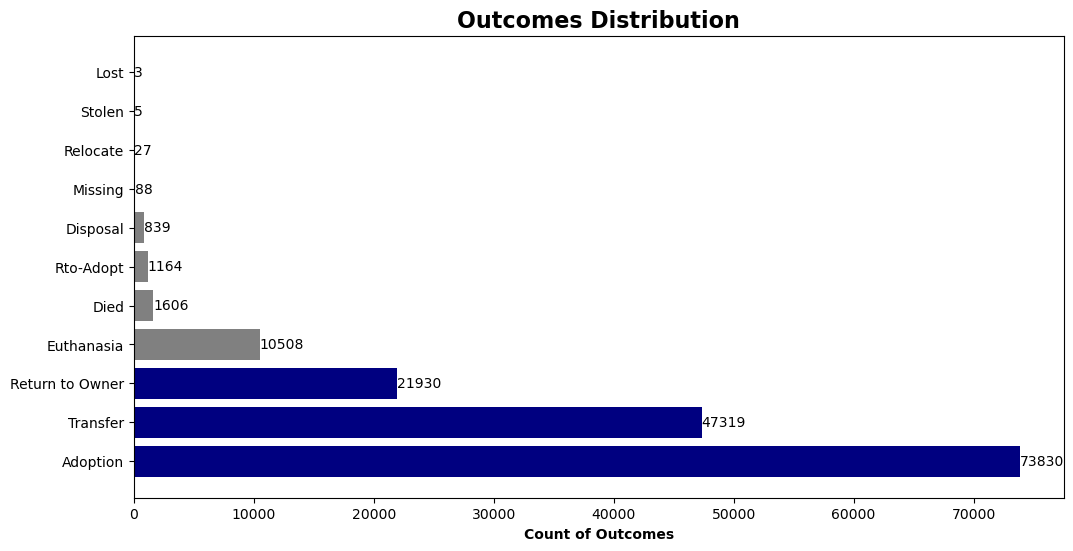

In [55]:
# Outcomes Distribution
total_outcomes_type = total_outcomes_type.sort_values(by='Count', ascending=False)
colors = ['navy' if i < 3 else 'gray' for i in range(len(total_outcomes_type))]

plt.figure(figsize=(12, 6))
plt.barh(
    total_outcomes_type['Outcome Type'], 
    total_outcomes_type['Count'], 
    color=colors
)

for i, value in enumerate(total_outcomes_type['Count']):
    plt.text(value + 1, i, str(value), va='center')

plt.title('Outcomes Distribution', fontsize=16, fontweight="bold")
plt.xlabel('Count of Outcomes', fontweight="bold")
plt.show()

**It’s interesting to see that there are a significant number of outcomes for the animals taken into the shelter. The color coding in the visual highlights the top three outcome types, which are as follows:**

1. **Adoptions** take the top spot, being the most common outcome for animals at the shelter. It's encouraging to note that a significant portion of the intakes are being adopted.
   
2. **Transfers** come in second place. This outcome can refer to animals being transferred to foster parents or to other shelters, reflecting a variety of situations where animals are moved for better care or placement.
   
3. **Return to Owner** ranks third. This outcome likely occurs when animals are microchipped, or the shelter identifies the true owner, resulting in the animal being returned.
These insights can help the shelter better understand the success of its adoption efforts and the movement of animals within the system.

**4. Over time, has the adoption rate of animals from the shelter increased or decreased?**

In [58]:
adoption_data = outcomes_data_cleaned[outcomes_data_cleaned['Outcome Type'].isin(['Adoption', 'Rto-Adopt'])]

total_adoption_data = adoption_data.groupby('Year')

total_adoption_data = total_adoption_data['Animal ID'].nunique()

total_adoption_data = total_adoption_data.reset_index(name = 'Count of Adoptions')

print(total_adoption_data)

    Year  Count of Adoptions
0   2013                1784
1   2014                6754
2   2015                6990
3   2016                7519
4   2017                7612
5   2018                7460
6   2019                8971
7   2020                4736
8   2021                6550
9   2022                6531
10  2023                6422
11  2024                6053


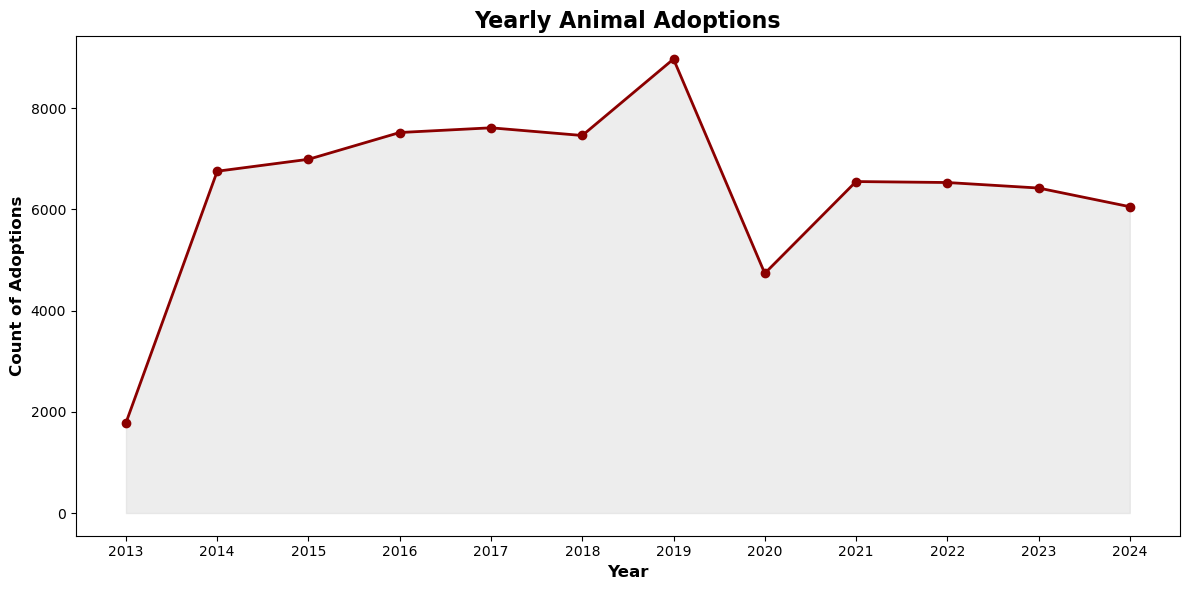

In [59]:
# Adoptions Trend over the Years
plt.figure(figsize=(12, 6))

plt.fill_between(
    total_adoption_data['Year'], 
    total_adoption_data['Count of Adoptions'], 
    color='lightgrey', 
    alpha=0.4
)

plt.plot(
    total_adoption_data['Year'], 
    total_adoption_data['Count of Adoptions'], 
    marker='o', 
    linewidth=2, 
    color='darkred'
)

plt.title('Yearly Animal Adoptions', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=12, fontweight='bold')
plt.ylabel('Count of Adoptions', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

**Based on the visual, it is evident that the adoption trend initially showed an upward trajectory. However, there was a sharp decline in 2020, and post-COVID, the number of adoptions has continued to gradually decline, without significant fluctuations.**

This insight is concerning for the shelter, as it highlights a downward trend in adoptions, particularly in the years following the pandemic. The decline could indicate challenges in the adoption process or shifting external factors that are affecting interest in adopting animals.

**Why This Insight Matters:**
Adoptions are crucial for the shelter's operations. When animals are adopted, the shelter can free up space to intake more animals that require urgent care and attention. A lower adoption rate means fewer animals are leaving the shelter, which in turn limits the shelter's capacity to help others in need.

**Next Steps for the Shelter:**
To address this issue, the shelter needs to explore additional campaigns, outreach programs, and other strategies to increase adoptions. This could involve partnerships, adoption events, or increased online visibility to reach a larger audience.

**Findings in Brief -**

**> Intakes Overview:** 2019 had the highest intakes, while 2013 had the lowest. On average, the shelter receives 13,235 intakes per year, with a noticeable drop in 2020 due to the COVID-19 pandemic.

**> Intake Types:** Stray rescues were the most common intake type, followed by Owner Surrender and Public Assist, with a relatively low number of euthanasia requests.

**> Outcome Types:** Adoptions are the most common outcome, followed by Transfers and Return to Owner, indicating successful rehoming and relocation efforts.

**> Adoption Trends:**
After an initial increase, adoptions saw a sharp decline in 2020 and have continued to decrease gradually post-COVID, signaling potential challenges in rehoming animals.

**Conclusion:**

In summary, the shelter has witnessed significant trends in intake types, outcomes, and adoption rates over the years. While the shelter has seen a steady number of intakes, particularly from strays, there has been a noticeable decline in adoptions, especially post-COVID. This highlights a potential area of concern for the shelter's operations and long-term capacity to assist animals in need.

**Suggestions:**

**> Adoption Campaigns:** Run targeted campaigns on social media, hold adoption events, and collaborate with local businesses to boost adoptions.

**> Community Outreach:** Build stronger community connections to encourage fostering and volunteering, helping with animal care and placements.

**> Data-Driven Decisions:** Keep analyzing trends to improve strategies and resource use, ensuring better support for animals.